In [1]:
# libraries 

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [2]:
# Read the data

df = pd.read_csv(r"C:\Files\UoE\Projects\4 - Python Correlation\movies.csv")

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Checking for missing data

df.isnull().sum()

# for col in df.columns:
#     pct_missing = np.mean(df[col].isnull())
#     print('{} - {}%'. format(col, pct_missing*100))

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
# dropping the blank rows

df.dropna(subset=['rating'], inplace=True)
df.dropna(subset=['released'], inplace=True)
df.dropna(subset=['score'], inplace=True)
df.dropna(subset=['votes'], inplace=True)
df.dropna(subset=['writer'], inplace=True)
df.dropna(subset=['star'], inplace=True)
df.dropna(subset=['country'], inplace=True)
df.dropna(subset=['budget'], inplace=True)
df.dropna(subset=['gross'], inplace=True)
df.dropna(subset=['company'], inplace=True)
df.dropna(subset=['runtime'], inplace=True)

In [5]:
# Columns Data Type

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Changing the datatype of numerical columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [7]:
# Matching the released date column with other similar ones

df['yearcorrect'] = df['released'].str.split(', ').str.get(1).str[:4]
df['countrycorrect'] = df['released'].str.split(', ').str.get(1).str[6:-1]


In [8]:
# to view the entire table without restrictions
    
# pd.set_option('display.max_rows', None) 

In [9]:
# sorting by gross

df.sort_values(by=['gross'], inplace=False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,countrycorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015,Sweden
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994,South Korea
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001,Canada
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982,United States


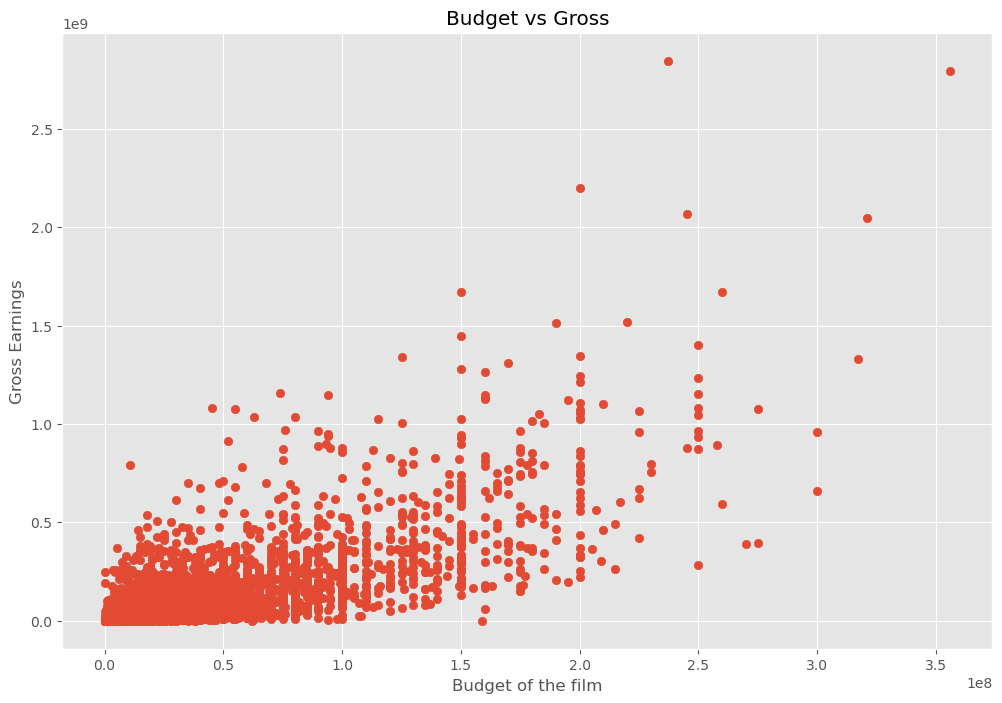

In [10]:
# Checking the correlation between gross and all other columns

# Scatter plot

plt.scatter(x=df['budget'], y=df['gross'])

plt.title("Budget vs Gross")
plt.xlabel("Budget of the film")
plt.ylabel("Gross Earnings")

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

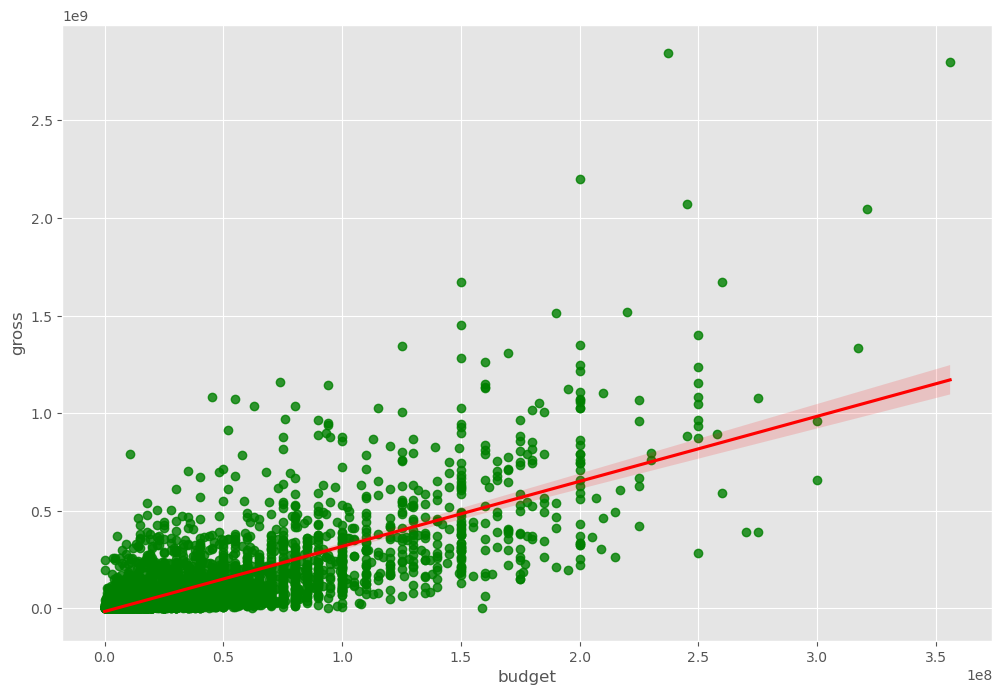

In [11]:
# plotting budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "green"}, line_kws={"color": "red"})

In [12]:
# Inference from the plot above:

# Budget of the film and the Gross Earning is highly correlated 

# The higher the film's budget, the greater its earnings.

In [13]:
# Correlation of all the columns

df.corr() # methods of corr: default-pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


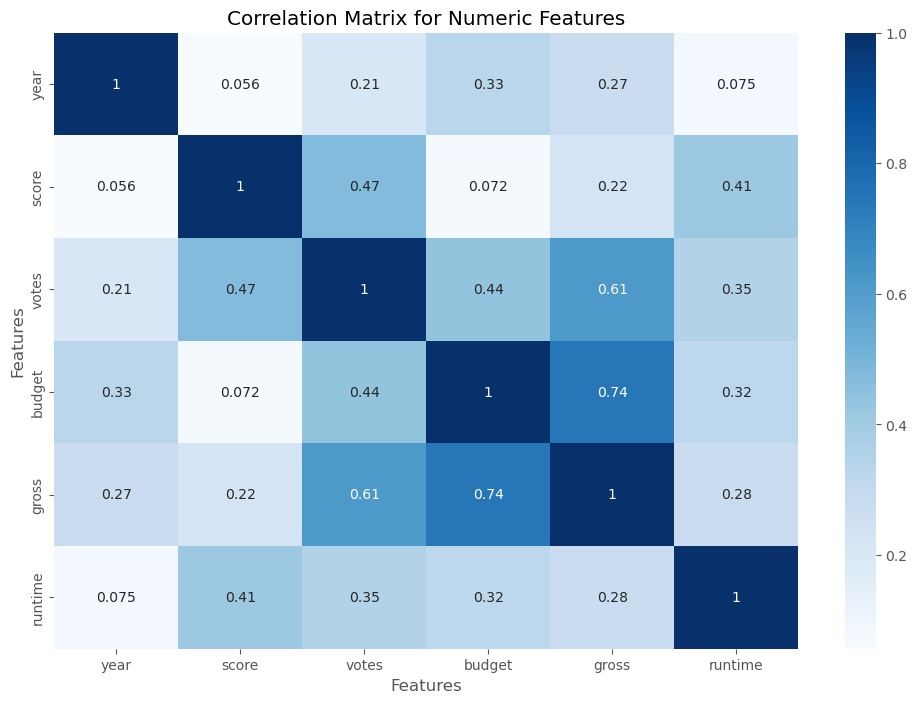

In [14]:
# Matrix Visualization of Correlation

corr_mat = df.corr(method = 'pearson')

sns.heatmap(corr_mat, annot=True, cmap='Blues')

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Features")
plt.ylabel("Features")

plt.show()

In [15]:
# Numerizing all the columns

df_num = df.copy()

for col_name in df_num.columns:
    if(df_num[col_name].dtype == 'object'):
        df_num[col_name] =  df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes # Numerizing the features with random numbers based on their category

In [16]:
df_num

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,countrycorrect
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,0,47
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,0,47
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,0,47
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,0,47
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0,40,47
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0,40,47
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0,40,47
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0,40,47


In [17]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,countrycorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020,United States
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020,United States
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020,United States
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020,United States


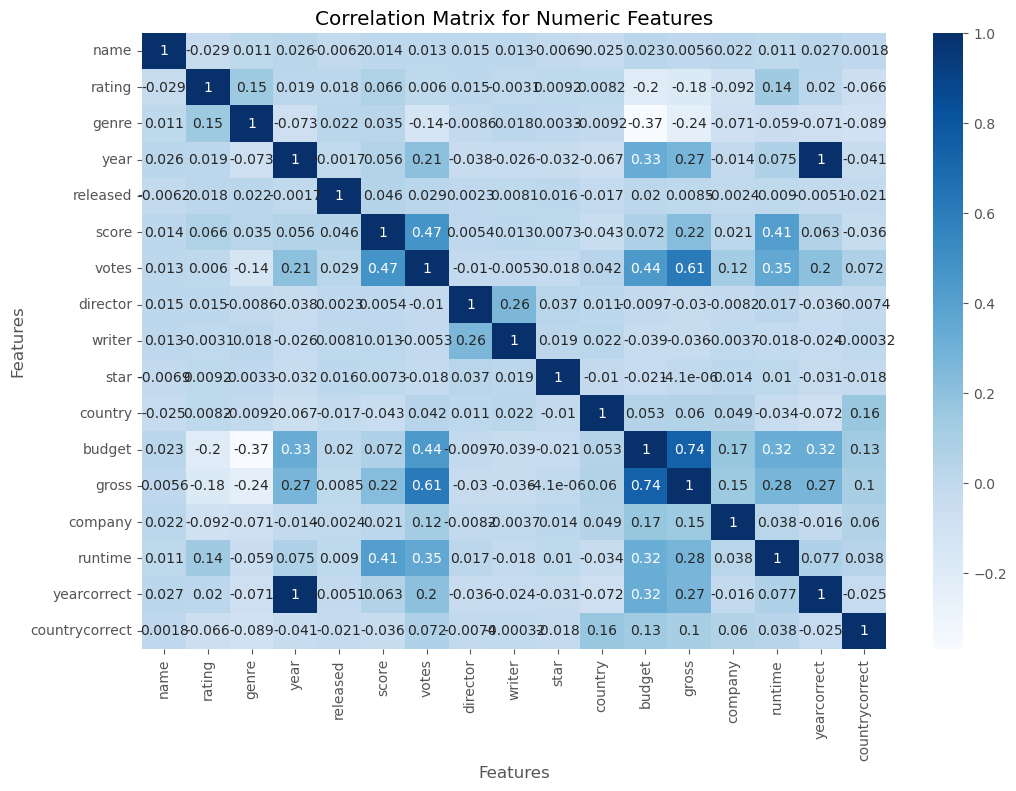

In [18]:
# Matrix Visualization of Correlation after Numerization of all the features

corr_mat_num = df_num.corr(method = 'pearson')

sns.heatmap(corr_mat_num, annot=True, cmap='Blues')

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Features")
plt.ylabel("Features")

plt.show()

In [19]:
# Correlation of all the columns after Numerizing

corr_num = df_num.corr()

corr_pairs = corr_num.unstack() # unstacking per each column

corr_pairs

name            name              1.000000
                rating           -0.029234
                genre             0.010996
                year              0.025542
                released         -0.006152
                                    ...   
countrycorrect  gross             0.102967
                company           0.060121
                runtime           0.038254
                yearcorrect      -0.025319
                countrycorrect    1.000000
Length: 289, dtype: float64

In [20]:
# sorting the paired features' values

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre           budget           -0.368523
budget          genre            -0.368523
gross           genre            -0.244101
genre           gross            -0.244101
budget          rating           -0.203946
                                    ...   
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
yearcorrect     yearcorrect       1.000000
countrycorrect  countrycorrect    1.000000
Length: 289, dtype: float64

In [21]:
# high correlated features - more than 0.5

high_corr = sorted_pairs[sorted_pairs>0.5]

high_corr

votes           gross             0.614751
gross           votes             0.614751
budget          gross             0.740247
gross           budget            0.740247
yearcorrect     year              0.996723
year            yearcorrect       0.996723
name            name              1.000000
writer          writer            1.000000
runtime         runtime           1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
yearcorrect     yearcorrect       1.000000
countrycorrect  countrycorrect    1.000000
dtype: floa

In [22]:
# Inference from the above correlation of all the features:

# Votes and budget are highly correlated to the gross earnings, evidently!